In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "Arial"

timestep = 2000
a = 1.5

o_x = 0
o_y = 0
o_xy = np.array([o_x, o_y])
U = 0.02 #[m/s]
init_x = -10
init_y = 1


8
8


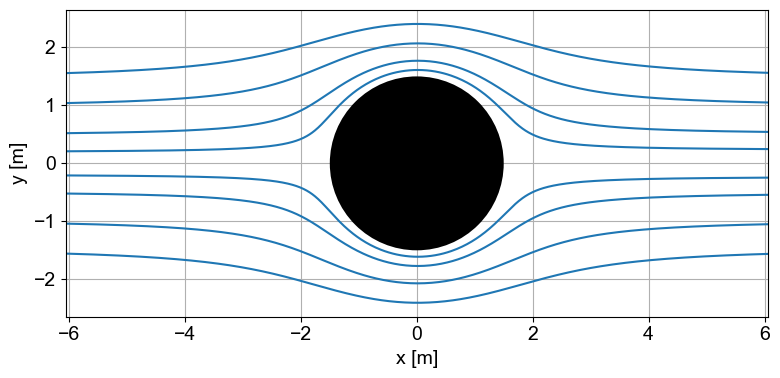

In [8]:
vx_list = []
vy_list = []
x_list = []
y_list = []

def update_xy(x, y, vx, vy):
    x += vx
    y += vy
    return x, y

def calc_potential_flow(U, a, r, theta):
    v_x = U*(1 - a**2/r**2 * np.cos(2*theta))
    v_y = -U*a**2/r**2*np.sin(2*theta)
    v_xy = np.array([v_x, v_y])
    return v_xy
    
x_list.append(init_x)
y_list.append(init_y)
vx_list.append(U)
vy_list.append(0)
for t in range(timestep):
    x = x_list[-1]
    y = y_list[-1]
    # print(x,y)
    pos_xy = np.array([x, y])
    r = np.linalg.norm(pos_xy - o_xy)
    # print(r)
    vec = pos_xy - o_xy
    # print(vec)
    theta = np.arctan2(vec[1], vec[0]) # atan2(y, x)
    # print(theta)
    v_xy = calc_potential_flow(U=U, a=a, r=r, theta=theta)
    # print(v_xy)
    x, y = update_xy(x=x, y=y, vx=v_xy[0], vy=v_xy[1])
    x_list.append(x)
    y_list.append(y)

def get_streamline(timestep, U, a, init_x, init_y):
    o_x = 0
    o_y = 0
    o_xy = np.array([o_x, o_y])
    x_list = []
    y_list = [] 
    x_list.append(init_x)
    y_list.append(init_y)
    for t in range(timestep):
        x = x_list[-1]
        y = y_list[-1]
        pos_xy = np.array([x, y])
        r = np.linalg.norm(pos_xy - o_xy)
        vec = pos_xy - o_xy
        # theta = np.arctan2(vec[1], vec[0]) # atan2(y, x)
        theta = np.arctan2(vec[1], vec[0]) # atan2(y, x)
        v_xy = calc_potential_flow(U=U, a=a, r=r, theta=theta)
        x, y = update_xy(x=x, y=y, vx=v_xy[0], vy=v_xy[1])
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list


stream_num = 8
init_y_list = [1.5, 1, 0.5, 0.2, -0.2, -0.5, -1, -1.5]
x_stream_list = []
y_stream_list = []
for i in range(stream_num):    
    init_x = -10
    init_y = init_y_list[i]
    x_list, y_list = get_streamline(timestep=timestep, U=U, a=a, init_x=init_x, init_y=init_y)
    x_stream_list.append(x_list)
    y_stream_list.append(y_list)
print(len(y_stream_list))

#stream line
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.axis("equal")
c = patches.Circle(xy=(0, 0), radius=a, fc='k',zorder=2)
ax.add_patch(c)
print(len(x_stream_list))
for i in range(stream_num):
    plt.plot(x_stream_list[i], y_stream_list[i], color='tab:blue')
plt.grid()
ax.set_xlim(-5,5)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()
plt.savefig("potential.png", dpi=200)
plt.show()



# Show vector field

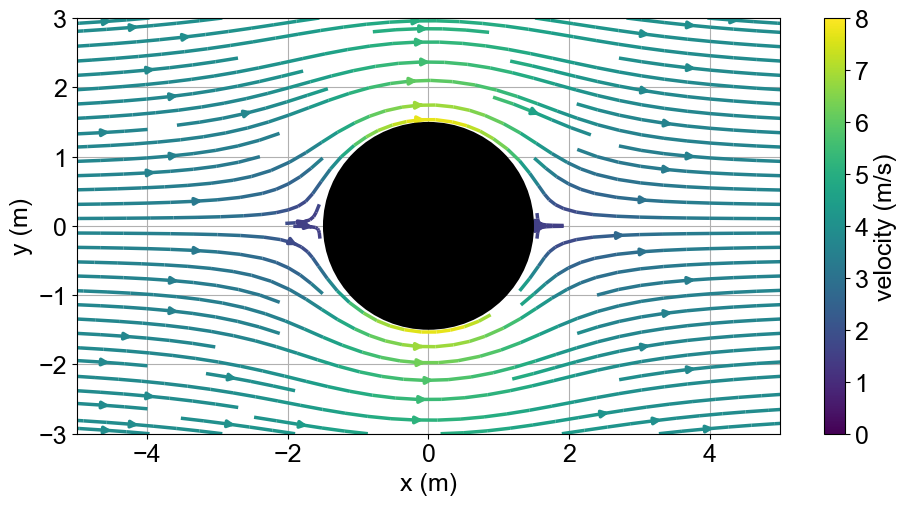

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.colors import Normalize

plt.rcParams['font.family'] = 'Arial'
plt.rcParams["font.size"] = 18


# Creating dataset
uniform_speed = 4
cylinder_radius = 1.5
x_lim = 5
y_lim = 3
lane_adj = 1
y_list, x_list = np.mgrid[-y_lim:y_lim:20j, -x_lim:x_lim:20j] # Y, X
x_list = x_list/lane_adj
U = uniform_speed*(1-(cylinder_radius)**2/(x_list**2 + y_list**2)*np.cos(2*np.arctan2(y_list, x_list)))
V = -uniform_speed*cylinder_radius**2/(x_list**2 + y_list**2)*np.sin(2*np.arctan2(y_list, x_list))
speed = np.sqrt(U**2 + V**2)
fig = plt.figure(figsize =(10, 5.4))
# gs = gridspec.GridSpec(nrows = 3, ncols = 2,
                    #    height_ratios =[1, 1, 2])

# Varying color along a streamline
# ax = fig.add_subplot(gs[0, 1])
ax = fig.add_subplot()
strm = ax.streamplot(x_list, y_list, U, V, color=speed, linewidth= 2.5, norm=Normalize(vmin=0, vmax=8))
fig.colorbar(strm.lines, label="velocity (m/s)")
c = patches.Circle(xy=(0, 0), radius=cylinder_radius, fc='k', zorder=2)
ax.add_patch(c)
# ax.axis("equal")
# ax.set_xticks([-2,0,2])
# ax.set_xticklabels([-2*lane_adj, 0, 2*lane_adj])
# ax.set_yticks([-6,-3,0,3,6])
# show plot

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.grid()
# plt.savefig("vector_field.png", dpi=150)
plt.show()